<a href="https://colab.research.google.com/github/kaybrian/Maternal-Health-Risk-Data-ML-model/blob/main/Maternal_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import the needed Modules for the project

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


In [33]:
# Import the data needed for the work
data = pd.read_csv('./data/Maternal Health Risk Data Set.csv')

# View the first few rows of the dataset
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [34]:
#  Check the summary statistics of the dataset
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### check for any missing data in the dataset


In [35]:
# Check for missing values in the dataset
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

### Check for the data types in the data 

In [36]:
# View the data types of each column
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

### look at the distribution of the Risk Level and also the count of it 

In [37]:
# look at teh Risk Level cases
data['RiskLevel'].value_counts()


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

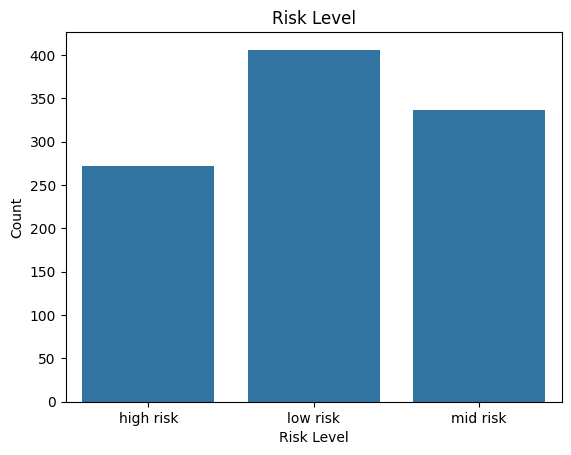

In [38]:
# Visualize the Risk Level cases
sns.countplot(x='RiskLevel', data=data)
plt.title('Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

In [39]:
# describe the data
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


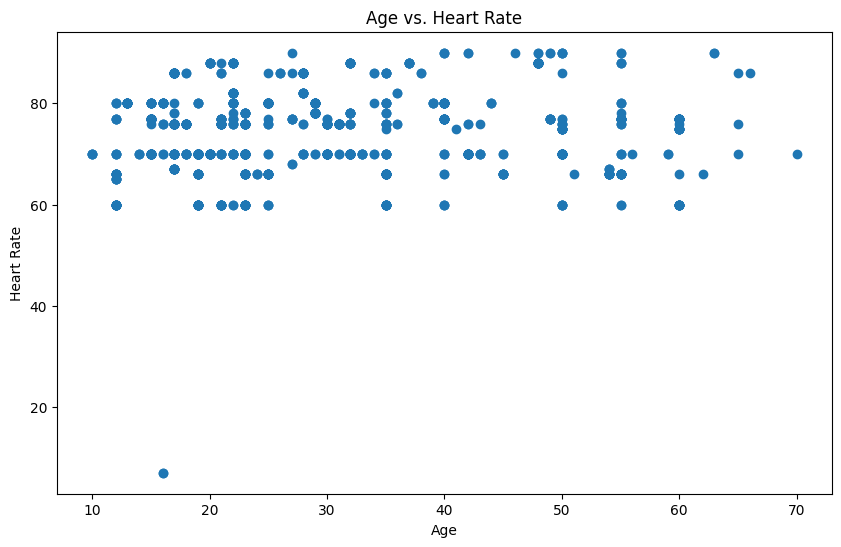

In [40]:
# take a close look at the age and heartbeat to see if there any out layers
# plot the age and heartbeat distribution
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['HeartRate'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Age vs. Heart Rate')
plt.show()

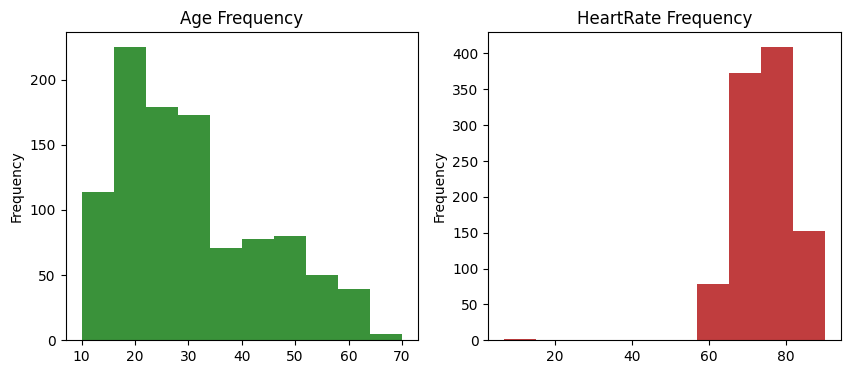

In [41]:
plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(121)
data.Age.plot.hist(color = "#3a923a")
plt.title("Age Frequency");

plt.subplot(122)
data.HeartRate.plot.hist(color = "#c03d3e")
plt.title("HeartRate Frequency");
plt.show()

### Get a general overview of the data distruntion and outliers


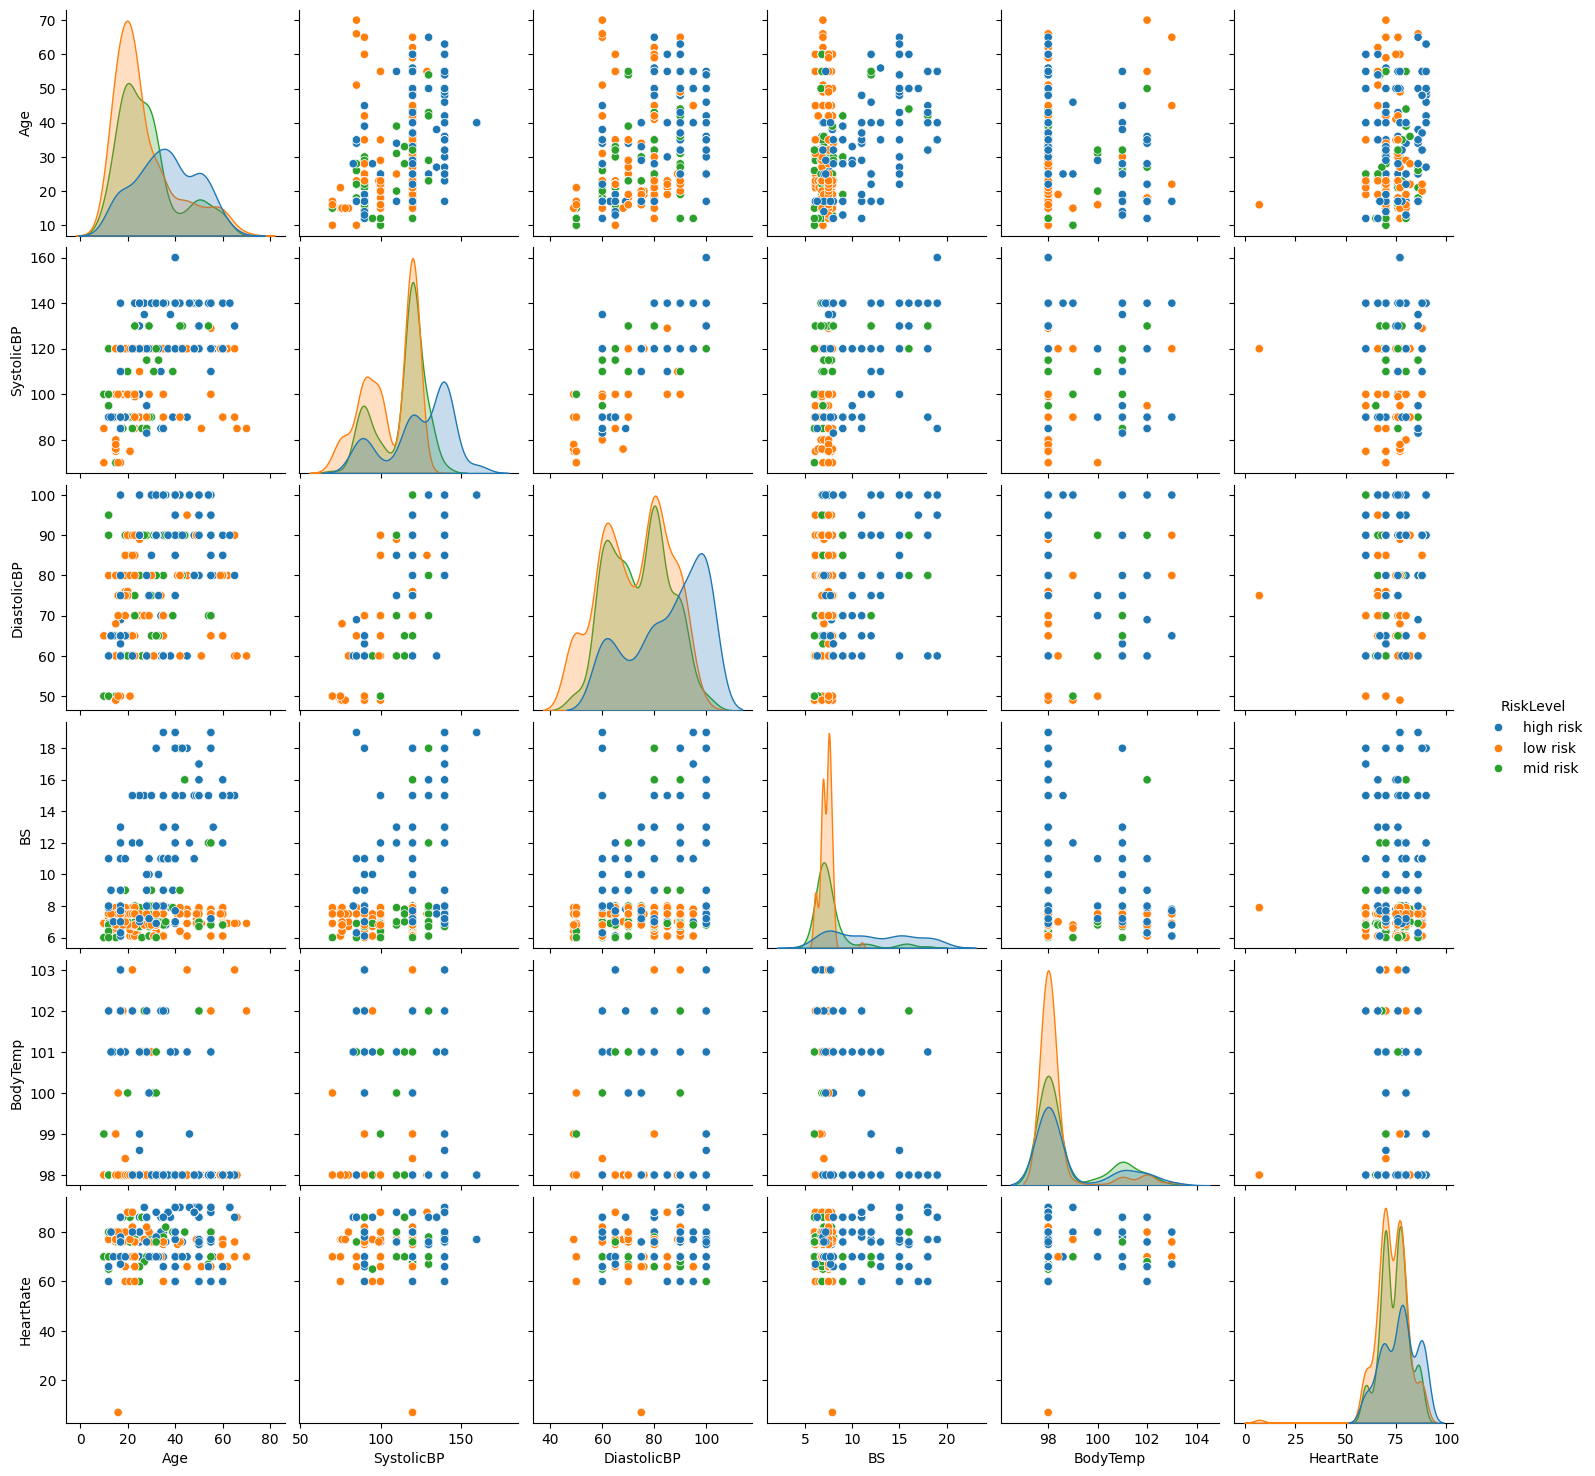

In [42]:
sns.pairplot(data.iloc[:,:], hue = "RiskLevel");
plt.show()

## Ecnode the Categories of the data. 



In [43]:
risk_map = {"low risk": 0, "mid risk": 1, "high risk": 2}

data['RiskLevel'] = data['RiskLevel'].map(risk_map)

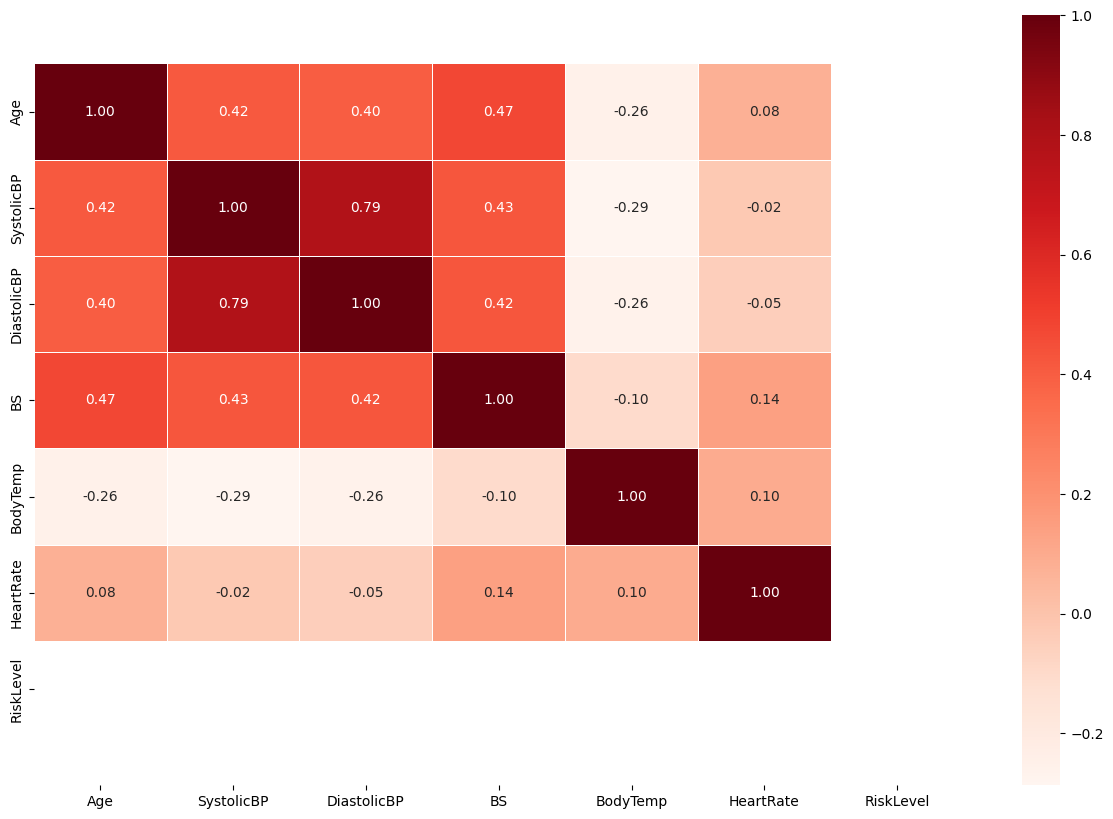

In [29]:
# plot a correlation heatmap
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Reds");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### Get the Features and Labels for the model


In [44]:
X = data.drop(['RiskLevel'], axis = 1)
y = data['RiskLevel']

In [45]:
y


0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 1014, dtype: int64

# split data into Training and Testing Sets 

In [46]:
#  split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
# standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
X_train

array([[0.73333333, 0.77777778, 1.        , 0.69230769, 0.        ,
        0.71084337],
       [0.66666667, 0.77777778, 0.80392157, 0.69230769, 0.        ,
        1.        ],
       [0.13333333, 0.55555556, 0.60784314, 0.14615385, 0.8       ,
        0.8313253 ],
       ...,
       [0.11666667, 0.22222222, 0.2745098 , 0.06923077, 0.6       ,
        0.75903614],
       [0.91666667, 0.66666667, 0.60784314, 0.69230769, 0.        ,
        0.95180723],
       [0.63333333, 0.77777778, 0.80392157, 0.69230769, 0.        ,
        1.        ]])

In [50]:
X_test.shape

(305, 6)

## Modeling 

### Build the model

In [53]:
# build the model using tensorflow and Keras
model = Sequential([
    Dense(32, activation = 'relu', input_shape = X_train.shape[1:]),
    Dense(16, activation = 'relu', kernel_regularizer=l2(0.01)),
    Dense(3, activation = 'softmax')
])

model.summary()

/home/brian/miniconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [early_stop])
### Evaluate the model

model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6872 - loss: 0.7384 - val_accuracy: 0.6754 - val_loss: 0.7518
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.7251 - val_accuracy: 0.6590 - val_loss: 0.7598
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.7558 - val_accuracy: 0.6754 - val_loss: 0.7521
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.7356 - val_accuracy: 0.6623 - val_loss: 0.7535
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.7753 - val_accuracy: 0.6656 - val_loss: 0.7537
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.7190 - val_accuracy: 0.6689 - val_loss: 0.7525
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.7421 - val_accuracy: 0.6689 - val_loss: 0.7510
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.7211 - val_accuracy: 0.6623 - 

In [58]:
# make predictions on the data to see

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


array([1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1,
       0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2,

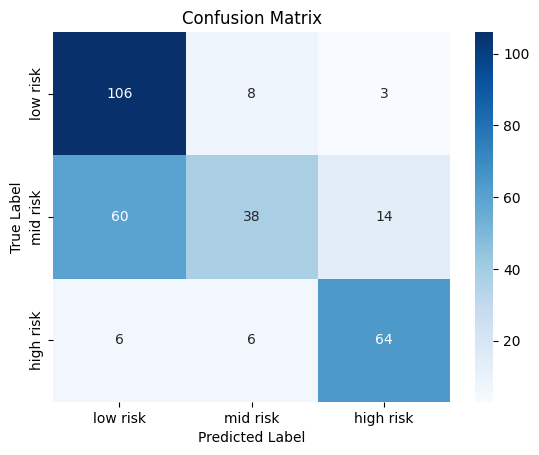

In [60]:
# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index = ['low risk', 'mid risk', 'high risk'], columns = ['low risk', 'mid risk', 'high risk'])

sns.heatmap(cm_df, annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Looking at the data, its clear that the model is not performing well. So this forces us to look for a different skill and model to build and work with. 

Using the Decision Tree Classifier, we can try to improve the model.


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create the decision tree classifier
dtree = DecisionTreeClassifier(random_state=101)

# create the parameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# create the grid search object
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

# print the best score
print(grid_search.best_score_)

best_tree = grid_search.best_estimator_





{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8419638397762462


In [63]:


# evaluate the best model on the test set
test_accuracy = best_tree.score(X_test, y_test)
print('Test Accuracy: ', test_accuracy)



Test Accuracy:  0.8032786885245902


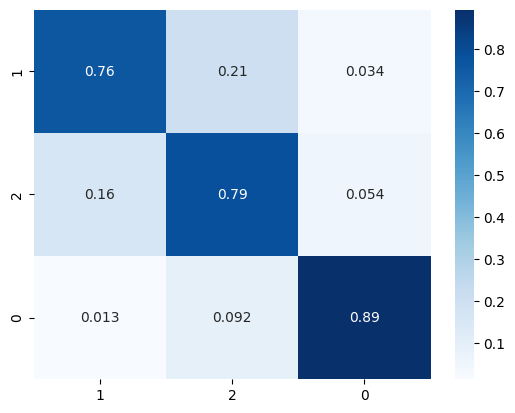

In [65]:


# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

ypred = best_tree.predict(X_test)

labels = y_test.unique()

cm_tree = confusion_matrix(y_test, ypred, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.show()



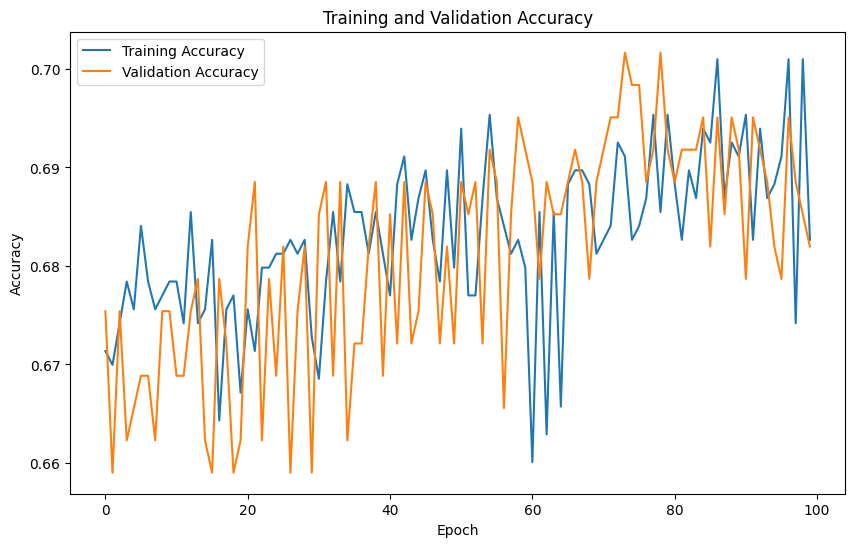

In [66]:
# plot the training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

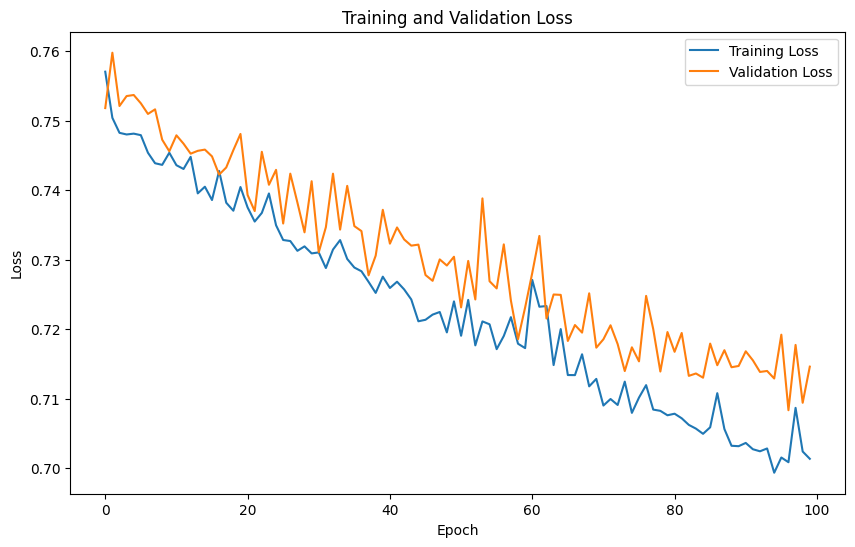

In [67]:
# plot the training and test loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Looking at both models, the Decision Tree Classifier is performing better than the Random Forest Classifier.In my case, I am using the Random Forest Classifier to build the model.



In [69]:

# save the model using pickle
import pickle
with open('my_model.pkl', 'wb') as f:
    pickle.dump(best_tree, f)

